# Naive Bayes Classifier

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Preparing the data

In [185]:
df=pd.read_csv('movie_data.csv',encoding='utf-8')
df.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


## Cleansing

In [186]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text
df['review']=df['review'].apply(preprocessor)

In [187]:
#from nltk.stem.porter import PorterStemmer
#def tokenizer_porter(text):
#    porter=PorterStemmer()
#    return [porter.stem(word) for word in text.split()]
#df['review']=df['review'].apply(tokenizer_porter)

In [188]:
#from nltk.corpus import stopwords
#stop=stopwords.words('english')
#def stop_word_removal(text):
#    return [w for w in text if w not in stop]
#df['review']=df['review'].apply(stop_word_removal)

In [189]:
df.head()

,review,sentiment
0,in 1974 the teenager martha moxley maggie grac...,1
1,ok so i really like kris kristofferson and his...,0
2,spoiler do not read this if you think about w...,0
3,hi for all the people who have seen this wonde...,1
4,i recently bought the dvd forgetting just how ...,0


## BoW (Bag-of-Words)

In [190]:
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
bag=count.fit_transform(df.review)

In [191]:
bag_train=bag[:30000]
bag_validation=bag[30000:40000]
bag_test=bag[40000:]

In [192]:
bag_train_pos=bag_train[(df[:30000].sentiment.values==1)]
bag_train_neg=bag_train[(df[:30000].sentiment.values==0)]
bag_validation_pos=bag_validation[(df[30000:40000].sentiment.values==1)]
bag_validation_neg=bag_validation[(df[30000:40000].sentiment.values==0)]
bag_test_pos=bag_test[(df[40000:].sentiment.values==1)]
bag_test_neg=bag_test[(df[40000:].sentiment.values==0)]

## Training (Maximum likelihood estimation)

In [193]:
#theta (smoothing)
gamma=2
theta_pos=(bag_train_pos.sum(axis=0)+gamma)/(bag_train_pos.sum()+gamma)
theta_neg=(bag_train_neg.sum(axis=0)+gamma)/(bag_train_neg.sum()+gamma)

In [194]:
#coefficient vector
alpha=np.log(theta_pos/theta_neg)

## Training (Determine threshold value)

In [195]:
a_validation_pos=[]
for i in range(bag_validation_pos.shape[0]):
    a_validation_pos.append((alpha*bag_validation_pos[i].T)[0,0])

In [196]:
a_validation_neg=[]
for i in range(bag_validation_neg.shape[0]):
    a_validation_neg.append((alpha*bag_validation_neg[i].T)[0,0])

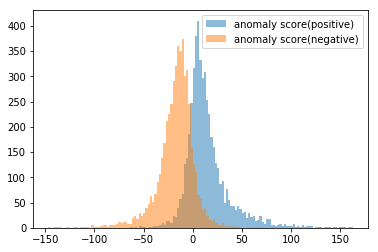

In [197]:
plt.hist(a_validation_pos,bins=100,alpha=0.5,label='anomaly score(positive)');
plt.hist(a_validation_neg,bins=100,alpha=0.5,label='anomaly score(negative)');
plt.legend();

In [198]:
nsa=[] #normal sample accuracy
asa=[] #anomalous sample accuracy
for threshold in range(-150,150,1):
    nsa.append(1-((np.array(a_validation_pos)<threshold).sum())/len(a_validation_pos))
    asa.append(((np.array(a_validation_neg)<threshold).sum())/len(a_validation_neg))

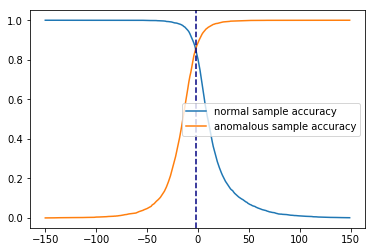

In [199]:
plt.plot(range(-150,150,1),nsa,label='normal sample accuracy')
plt.plot(range(-150,150,1),asa,label='anomalous sample accuracy')
plt.axvline(-2, ls = "--", color = "navy")
plt.legend();

## Test

In [200]:
#normal sample accuracy
a_test_pos=[]
for i in range(bag_test_pos.shape[0]):
    a_test_pos.append((alpha*bag_test_pos[i].T)[0,0])
1-((np.array(a_test_pos)<-2).sum()/len(a_test_pos))

0.8494084620012031

In [201]:
#anomalous sample accuracy
a_test_neg=[]
for i in range(bag_test_neg.shape[0]):
    a_test_neg.append((alpha*bag_test_neg[i].T)[0,0])
(np.array(a_test_neg)<-2).sum()/len(a_test_neg)

0.84360662278077